# Pust og nymerisk kode

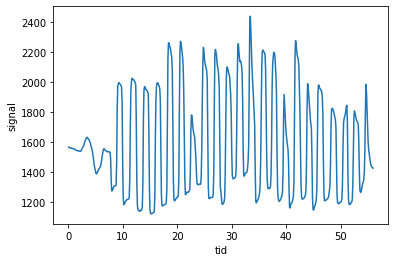

In [5]:
from pylab import*

data = loadtxt('sample.txt',skiprows=1,delimiter=',')

tid = data[:,1]
signal = data[:,2]


plot(tid, signal)
xlabel('tid')
ylabel('signal')
show()




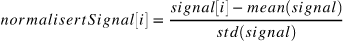

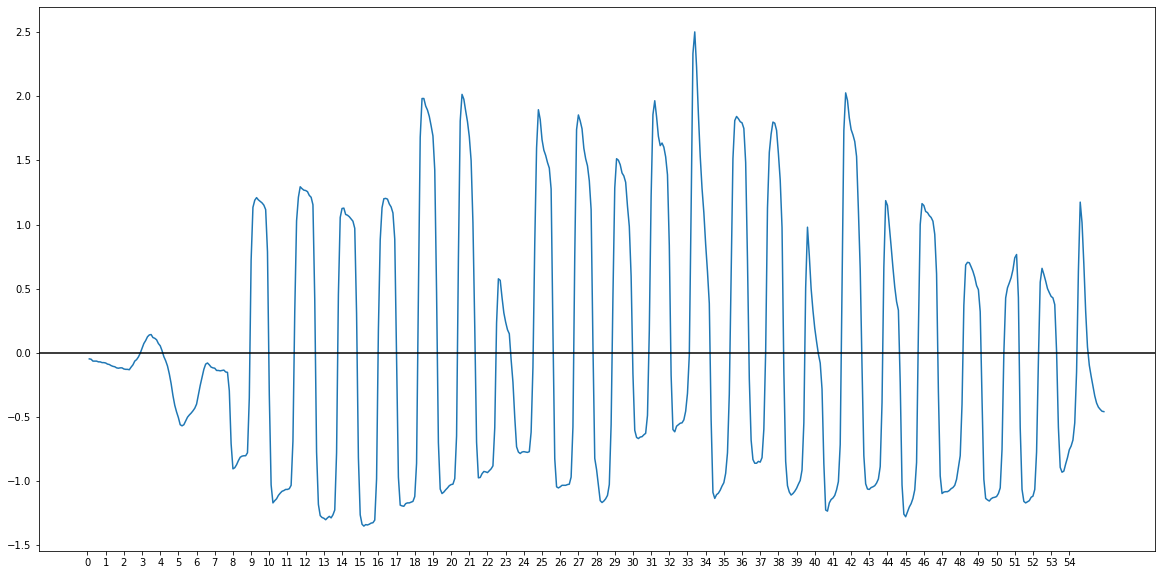

NameError: name 'funksjonsverd' is not defined

In [11]:
from pylab import*
norm_signal = []

for i in range(len(signal)):
    n = (signal[i]-mean(signal))/std(signal)
    norm_signal.append(n)

figure(figsize=(20,10))
xticks(range(int(min(tid)), int(max(tid))))
    
plot(tid, norm_signal)
axhline(y=0, color='black')
show()

def f(x):
    feilmargin = 0.0001
    funksjonsverdi = 0
    for i in range(len(tid)):
        if abs(tid[i]-x)<=feilmargin:
            funksjonsverdi=normaliserte_pustedata[i]
    return funksjonsverd


def halveringsmetoden(f,a,b,N):
    if f(a)*f(b) >= 0:
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            return m_n
        else:
            return None
    return (a_n + b_n)/2

nullpunkter = []
antall_nullpunkter = 0

# Finner nullpunktene og verifiserer vha. plotting
for i in range(0, int(max(tid)), 1):
    halverings_rot = halveringsmetoden(f,i,i+1,100)
    nullpunkter.append(halverings_rot)
    if halverings_rot != None:
        antall_nullpunkter += 1

figure(1)
scatter(nullpunkter,zeros(len(nullpunkter)),color='firebrick')
xlim(0,max(tid))
show()

figure(2)
plot(tid[:-1],derivert_signal)
title('Deriverte signaldata')
show()

frekvens = antall_nullpunkter/tid[-1]
print("Pustefrekvens:", frekvens)

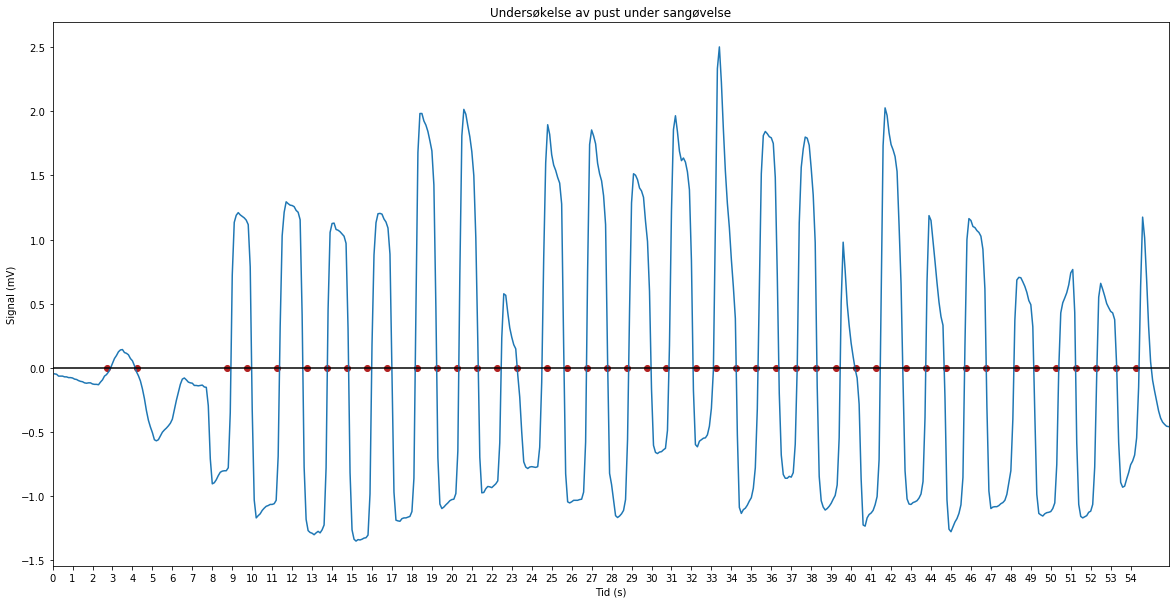

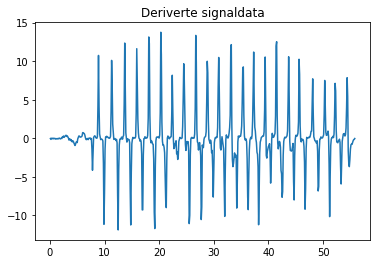

Pustefrekvens: 0.8050089445438283


In [13]:
from pylab import *

# Leser fil
data = loadtxt('sample.txt',skiprows=1,delimiter=',')

tid = data[:,1]  # Tid i s
signal = data[:,2]       # Signal i mV

# Plotter signal
#plot(tid,signal)

# Normaliserer data
def normaliser(pust):
    snitt = np.mean(pust)
    avvik = np.std(pust)
    normalisertPust =[]
    i=0
    for i in range(len(pust)):
        normalisertPust.append((pust[i]-snitt)/avvik)
        i+=1
    return normalisertPust


figure(figsize=(20,10))
normaliserte_pustedata = normaliser(signal)
plot(tid, normaliserte_pustedata)
xlabel('Tid (s)')
ylabel('Signal (mV)')
title('Undersøkelse av pust under sangøvelse')
xticks(range(int(min(tid)), int(max(tid))))
axhline(y=0,color='black')


# Deriverer data
def derivert(t,y):
    dydt = []
    for i in range(len(y)-1):
        dy = y[i+1] - y[i]
        dt = t[i+1] - t[i]
        dydt.append(dy/dt)
    return dydt


derivert_signal = derivert(tid, normaliserte_pustedata)


# Definerer funksjoner fra de diskrete verdiene
def f(x):
    feilmargin = 0.0001
    funksjonsverdi = 0
    for i in range(len(tid)):
        if abs(tid[i]-x)<=feilmargin:
            funksjonsverdi=normaliserte_pustedata[i]
    return funksjonsverdi

#Define the breathing function from the lookup table


#Definerer den deriverte av pustedataene fra de diskrete verdiene
def Df(x):
    feilmargin = 0.0001
    funksjonsverdi = 0
    for i in range(len(tid)):
        if abs(tid[i]-x)<=feilmargin:
            funksjonsverdi=derivert_signal[i]
    return funksjonsverdi

# Definere halveringsmetoden
def halveringsmetoden(f,a,b,N):
    if f(a)*f(b) >= 0:
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            return m_n
        else:
            return None
    return (a_n + b_n)/2

nullpunkter = []
antall_nullpunkter = 0

# Finner nullpunktene og verifiserer vha. plotting
for i in range(0, int(max(tid)), 1):
    halverings_rot = halveringsmetoden(f,i,i+1,100)
    nullpunkter.append(halverings_rot)
    if halverings_rot != None:
        antall_nullpunkter += 1

figure(1)
scatter(nullpunkter,zeros(len(nullpunkter)),color='firebrick')
xlim(0,max(tid))
show()

figure(2)
plot(tid[:-1],derivert_signal)
title('Deriverte signaldata')
show()

frekvens = antall_nullpunkter/tid[-1]
print("Pustefrekvens:", frekvens)